In [1]:
import ptc_twiss.madx_configuration as twiss_configuration
import ptc_twiss.optical_functions as twiss_optics_parameters
import ptc_twiss.transporter as twiss_transport
import ptc_track.madx_configuration as track_configuration
import ptc_track.optical_functions as track_optics_parameters
import ptc_track.transporter as track_transport
import visualization.optics_parameter_visualisation as plotter
import data.grid_configuration as buc
import data.particles_generator as pg
import os
import matplotlib.pyplot as plt
import seaborn as sns
from data.parameters_names import ParametersNames as Parameters

In [2]:
sns.set_style("whitegrid")

Change below path for path to unziped folder

In [3]:
path_to_project = "/home/rafalmucha/Pobrane/optic"
folder_name = "2017_nominal"
script_file_name = "ptc_twiss_script.madx"
xml_file_name = "configuration_reco_beam1.xml"

In [4]:
path_to_script = os.path.join(path_to_project, folder_name, script_file_name)
s = 219.55
twiss_configuration = twiss_configuration.TwissConfiguration(path_to_script, s)
twiss_transporter = twiss_transport.get_transporter(twiss_configuration)

In [5]:
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 2
track_configuration = track_configuration.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)
track_transporter = track_transport.get_transporter(track_configuration)

In [6]:
x_mean = 0
sigma_x = 0
theta_x_mean = 75e-6
sigma_theta_x = 75e-6
y_mean = 0
sigma_y = 0
theta_y_mean = 0
sigma_theta_y = 0
pt_mean = 0
sigma_pt = 0

x_resolution = 1
theta_x_resolution = 11
y_resolution = 1
theta_y_resolution = 1
pt_resolution = 1

grid_configuration_120 = buc.GridConfiguration.from_sigma(x_mean, sigma_x, x_resolution,
                                                       theta_x_mean, sigma_theta_x, theta_x_resolution,
                                                       y_mean, sigma_y, y_resolution,
                                                       theta_y_mean, sigma_theta_y, theta_y_resolution,
                                                        pt_mean, sigma_pt, pt_resolution)
grid_120_name = r"$\theta_x = 120\mu$rad "
particles = pg.generate_from_range(grid_configuration_120)

In [7]:
title_sufix = "2017 nominal; " + r"$\theta_x$=XA; $\xi$=0"
transporter1 = "ptc_twiss; madx 5.05.02"

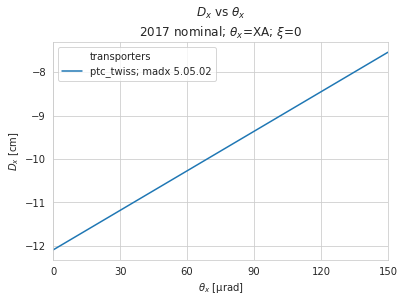

In [8]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_d_x, twiss_configuration)
}

axes = plotter.plot_optical_functions(particles, optical_functions, Parameters.THETA_X, Parameters.D_X, title_sufix)
# axes.set_ylim(-10.25, -8.25)
axes.set_xticks(range(0, 151, 30))